# Простейшее введение в Keras
В этом блокноте мы покажем, что использование фреймворка Keras очень сильно упрощает построение архитектур нейронных сетей. Не вдаваясь в детали, их мы рассмотрим в следующем блокноте, построим простейшую модель логистической регрессии на сгенерироанных данных.

Загрузим библиотеки, тип моделей — Sequential, то есть последовательная, тип слоя — Dense – полносвязный слой.

In [74]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Создадим объект класса Sequential, добавим один слой, который принимает на вход две переменные, решать будем задачу классификации (на два класса). В качестве функции активации будем использовать сигмоиду, в качестве функции потерь будем использовать (бинарную) кросс-энтропию, в качестве метода минимизации функции потерь — стохастический градиентный спуск, отслеживать будем `accuracy`.

In [75]:
log_regression = Sequential()
log_regression.add(Dense(1, input_dim=2, activation='sigmoid'))
log_regression.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Сгенерируем наши данные. Возьмем стандартные нормальные двумерные распределения с центрами в точках `p0` и `p1`.

In [76]:
def sampler(n, x, y):
  return np.random.normal(size=[n, 2]) + [x, y]

In [77]:
def sample_data(n=1000, p0=(0., -1.), p1=(2., 1.)):
  zeros, ones = np.zeros((n, 1)), np.ones((n, 1))
  labels = np.vstack([zeros, ones])
  z_sample = sampler(n, x=p0[0], y=p0[1])
  o_sample = sampler(n, x=p1[0], y=p1[1])
  return np.vstack([z_sample, o_sample]), labels

Семплируем данные для обучения и для теста, изобразим полученное на графике

In [78]:
X_train, y_train = sample_data()
X_test, y_test = sample_data(100)

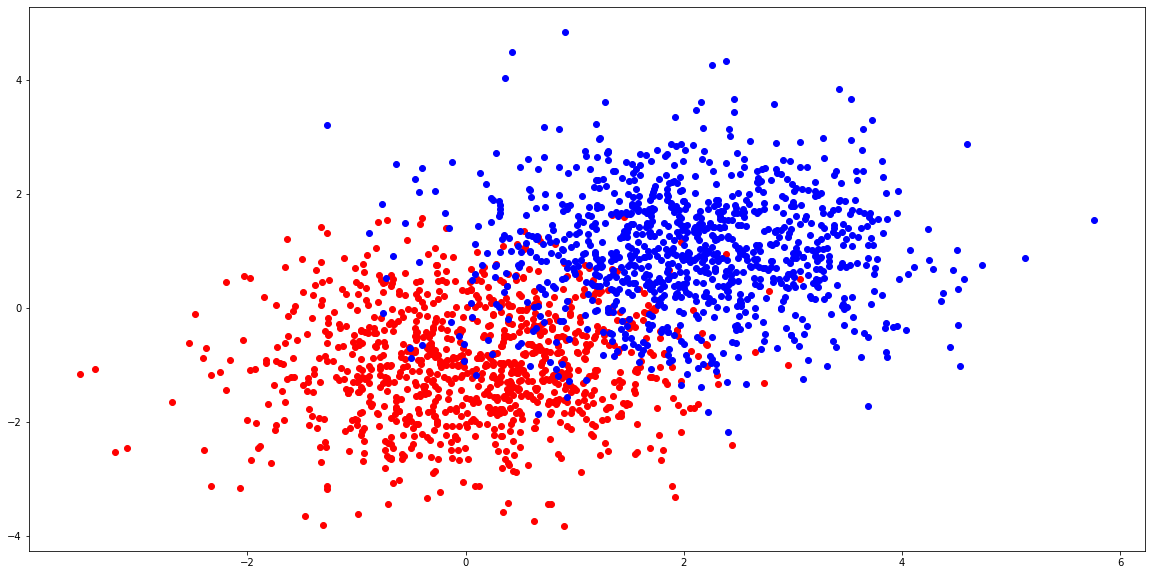

In [79]:
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 0][y_train[:, 0] == 0.0], X_train[:, 1][y_train[:, 0] == 0.0], color = 'red')
plt.scatter(X_train[:, 0][y_train[:, 0] == 1.0], X_train[:, 1][y_train[:, 0] == 1.0], color = 'blue')

Видно, что данные более ли менее линейно разделимы. Попробуем найти разделяющую прямую. Пришло время обучать модель. Задаем данные для обучения, для валидации, размер батча, количество эпох.

In [80]:
log_regression.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test,y_test))


Epoch 1/100
 27/125 [=====>........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6620

2022-07-03 17:01:41.485664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 5ms/step - loss: 0.4994 - accuracy: 0.7575 - val_loss: 0.4141 - val_accuracy: 0.8150
Epoch 2/100
 15/125 [==>...........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.8167

2022-07-03 17:01:42.052006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 4ms/step - loss: 0.3636 - accuracy: 0.8450 - val_loss: 0.3420 - val_accuracy: 0.8550
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3218 - accuracy: 0.8645 - val_loss: 0.3084 - val_accuracy: 0.8900
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.8715 - val_loss: 0.2873 - val_accuracy: 0.9050
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8760 - val_loss: 0.2720 - val_accuracy: 0.9050
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.8815 - val_loss: 0.2602 - val_accuracy: 0.9050
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.8845 - val_loss: 0.2505 - val_accuracy: 0.9050
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.8880 - val_loss: 0.2424 - val_accuracy: 0.9100
Epoch 9/100

Получим веса модели. Уравнение разделяющей гиперплоскости имеет вид
$$
x_{coef} \cdot x + y_{coef} \cdot y + bias = 0
$$

In [81]:
bias = log_regression.get_weights()[1]
x_coef = log_regression.get_weights()[0][0]
y_coef = log_regression.get_weights()[0][1]

Построим все на одном графике и визуально оценим то, что получилось.

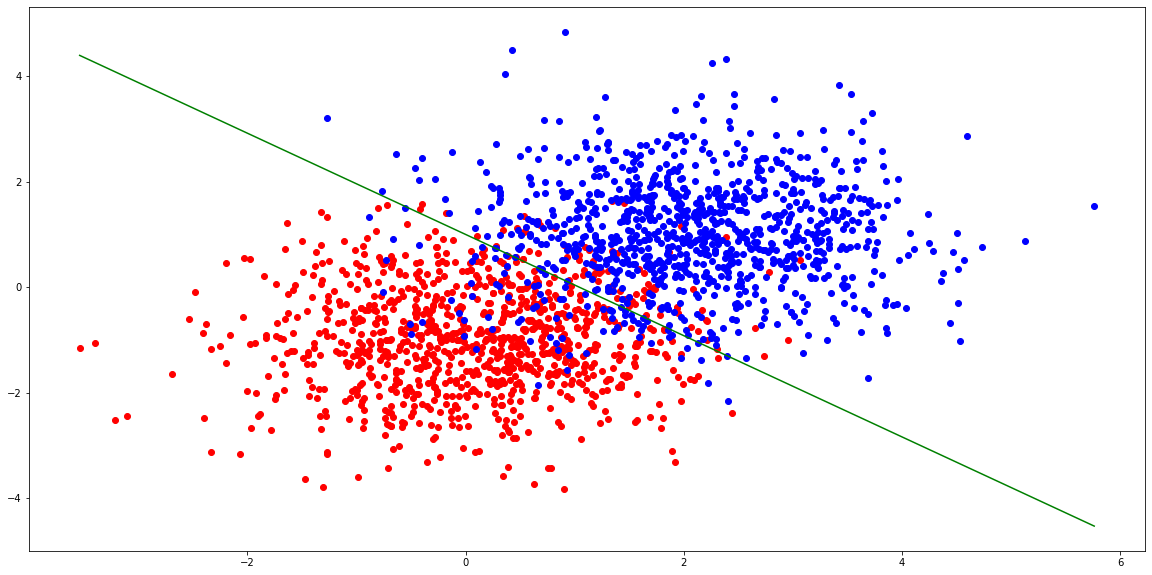

In [85]:
x = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 0][y_train[:, 0] == 0.0], X_train[:, 1][y_train[:, 0] == 0.0], color = 'red')
plt.scatter(X_train[:, 0][y_train[:, 0] == 1.0], X_train[:, 1][y_train[:, 0] == 1.0], color = 'blue')
plt.plot(x, (- x_coef * x - bias) / y_coef, color = 'green')
